In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip

#This will be doing most of the work
import networkx as nx

import sklearn #For generating some matrices
import pandas as pd #For DataFrames
import numpy as np #For arrays
import matplotlib.pyplot as plt #For plotting
import seaborn #Makes the plots look nice
import scipy #Some stats
import nltk #a little language code
from IPython.display import Image #for pics

import pickle #if you want to save layouts
import os
import re
import zipfile
import sys

%matplotlib inline

In [3]:
dfs = []
i = 0
for file in os.listdir("data/"):
    print(file, i)
    if 'json' in file:
        dfs.append(pd.read_json('data/' + file).transpose())
        dfs[i]['Type'] = file[:4]
        i += 1

ESFJ.json 0
ISFP.json 1
INFJ.json 2
ENFP.json 3
.DS_Store 4
INTP.json 4
ENTJ.json 5
ESTP.json 6
ISTJ.json 7
ENTP.json 8
INTJ.json 9
ISTP.json 10
ESTJ.json 11
ESFP.json 12
ENFJ.json 13
INFP.json 14


In [10]:
small_dfs = [df.sample(frac=0.01) for df in dfs]
all_small = pd.concat(small_dfs)

In [11]:
all_small = pd.concat(small_dfs)

In [12]:
all_small.reset_index(drop=True, inplace=True)
all_small

,creator_id,created_at,liked_by,text,hashtags,media,Type
2012-10-29 14:19:34.765334528,177995084,2021-01-19 13:22:22,[299416469],18 months.\n\nIt’s been 18 months.\n\n222 mont...,[],[https://pbs.twimg.com/media/EsGQniNXMAANrSe.jpg],ESFJ
2012-09-24 05:35:12.729780231,21014439,2021-01-11 03:01:03,[839119707462643713],"""The PGA of America Board of Directors voted t...",[],[],ESFJ
2012-10-12 10:11:28.379195394,319814341,2021-01-15 11:06:43,[3314031569],irene is so mature and responsible and that is...,[],[],ESFJ
2006-05-20 19:40:29.333024768,392088359,2019-07-08 08:57:06,[599811633],i'm calling the police https://t.co/YlzH5gFfMx,[],[],ESFJ
2011-01-10 22:51:39.376869379,24216951,2020-08-15 18:18:05,[115341674],Taylor Swift wants you to vote early to get Pr...,[],[],ESFJ
...,...,...,...,...,...,...,...
2012-10-31 06:51:11.536951299,1056871799642902528,2021-01-19 23:02:06,[1191237140644028416],@akomodacja Dobrych snów 😊😊😊,[],[],INFP
2012-11-08 16:12:38.308204545,375721095,2021-01-21 23:02:33,[1030133437431271424],Articles of Impeachment have been filed agains...,[],[],INFP
2010-08-27 09:11:03.259574273,15115741,2020-07-14 04:50:32,[15620292],Aw man. RIP Grant. Burger Bro night was a favo...,[],[https://pbs.twimg.com/media/Ec3G_ZNU0AA2R5C.jpg],INFP
2012-11-03 18:30:05.212389376,130046025,2021-01-20 18:58:42,[26585614],Just had my first customer call me names and t...,[],[],INFP


In [13]:
all_small['Introvert'] = all_small['Type'].apply(lambda x: x[0]=='I')

In [14]:
all_small['tokenized_sents'] = all_small['text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
all_small['normalized_sents'] = all_small['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

In [15]:
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

In [16]:
all_small['normalized_sents']

2012-10-29 14:19:34.765334528    [[month], [month], [month], [god, miss], [http...
2012-09-24 05:35:12.729780231    [[pga, america, board, director, vote, tonight...
2012-10-12 10:11:28.379195394    [[irene, mature, responsible, look], [talk, is...
2006-05-20 19:40:29.333024768        [[be, call, police, https://t.co/ylzh5gffmx]]
2011-01-10 22:51:39.376869379    [[taylor, swift, want, vote, early, president,...
                                                       ...                        
2012-10-31 06:51:11.536951299              [[@akomodacja, dobrych, snów, 😊, 😊, 😊]]
2012-11-08 16:12:38.308204545    [[article, impeachment, file, president, biden...
2010-08-27 09:11:03.259574273    [[aw, man], [rip, grant], [burger, bro, night,...
2012-11-03 18:30:05.212389376    [[customer, name, tell, take, business], [bc],...
2012-11-04 00:12:37.901582337                        [[@bellalunaestela, hallelu]]
Name: normalized_sents, Length: 3750, dtype: object

In [17]:
int_small = all_small[all_small.Introvert==True]

In [19]:
ext_small = all_small[all_small.Introvert==False]

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that render networks to meaningfully characterize the structure of words and documents (or subdocuments like chapters or paragraphs) from your corpus. What are useful filters and thresholds and what semantic structures do they reveal that give insight into the social world and social game inscribed in your corpus? Interrogate interesting subgraphs of your network and detail what they reveal about the semantic space involved.

In [20]:
g_int = wordCooccurrence(int_small['normalized_sents'][:1000].sum())

In [21]:
g_ext = wordCooccurrence(ext_small['normalized_sents'][:1000].sum())

In [22]:
len(g_int.nodes) #extroverts liked tweets with more unique words, 10% difference

5741

In [23]:
len(g_ext.nodes) 

6121

In [24]:
len(g_ext.edges)

31090

In [25]:
len(g_int.edges)

32561

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2368 missing from c

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128391 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127878 missing fro

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2313 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3614 missing from current

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129346 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51096 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54812 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49440 missing from 

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128075 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50616 missing fro

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119967 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2306 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2327 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2354 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2340 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2367 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2381 missing from current font.
  f

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45716 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128170 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128153 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 5586 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 5603 missing from current fon

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2313 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3632 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3614 missing from current font.
  f

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2370 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128071 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 28779 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 33457 missing from current fo

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128311 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128227 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12619 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128162 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129395 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129396 missing from curren

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128420 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127876 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128155 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127775 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127807 missing from curre

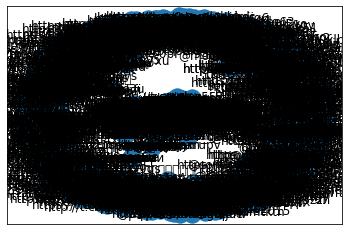

In [26]:
nx.draw_networkx(g_int)

In [27]:
def tokenize(text):
    tokenlist = lucem_illud.word_tokenize(text)
    normalized = lucem_illud.normalizeTokens(tokenlist)
    return normalized

In [28]:
import sklearn.feature_extraction


In [62]:
all_tiny = all_small.sample(frac=0.25)

In [55]:
a = all_tiny['text'][5]
a += ' egemen'
print(a)

.@museumsontario working with @musecdn to serve Ontario Museums! 

#CMAMC2019 #MuseumsConnectON https://t.co/KrgnrzoOxF egemen


In [66]:
def clean_tweet(a):
    a = re.sub('@\w+', ' ', a)
    a = re.sub('htt.*\s', ' ', a)
    return a

In [77]:
all_tiny['text'] = all_tiny['text'].apply(lambda x: clean_tweet(x + ' '))

In [78]:
Vectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer=tokenize)
Vects_incidence = Vectorizer.fit_transform(all_tiny['text'])

In [79]:
Vects_incidence.shape

(938, 4634)

In [80]:
g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((Vectorizer.get_feature_names()[i] for i in range(Vects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(Vects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, Vectorizer.get_feature_names()[w], {'weight' : Vects_incidence[d, w]}) for d, w in zip(*Vects_incidence.nonzero())))

In [34]:
print(nx.info(g_2mode))

Name: 
Type: Graph
Number of nodes: 6450
Number of edges: 9556
Average degree:   2.9631


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8419 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12484 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2309 missing from cur

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49913 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50416 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50417 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50473 missing from c

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8419 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12484 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2309 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3655 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3593 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3603 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3660 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3635 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3597 missing from current font.
  f

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 120002 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 120001 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 119998 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 119892 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 120287 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 120284 missing from curre

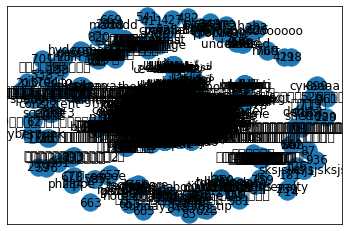

In [81]:
nx.draw_networkx(g_2mode)

In [121]:
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g_2mode.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g_2mode.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono

In [86]:
grouped_tiny = all_tiny.loc[:, ['text', 'Type']].groupby('Type').sum()

In [109]:
grouped_tiny

,text
Type,
ENFJ,I’m sorry this brick oven pizza got me crackin...
ENFP,3 things every human should know:\n\n🔥Arctic p...
ENTJ,"I had 6 months to get in shape, work on my men..."
ENTP,We force kids to blindly follow the syllabus a...
ESFJ,How u treat your girl is a reflection of you. ...
ESFP,Not perfect but good enough! Small salmon plan...
ESTJ,Obrigado pelo dia de hoje ❤️ \n\n📸 : 02:2...
ESTP,New! 2014 Readers' Choice Awards - Winners Rev...
INFJ,"Whew, I’m having five children so hopefully at..."


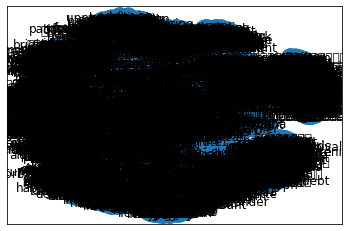

In [97]:
nx.draw_networkx(g_2mode1)

In [118]:
Vectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer=tokenize)
Vects_incidence = Vectorizer.fit_transform(grouped_tiny['text'])

In [119]:
Vects_incidence.shape

(15, 4634)

In [132]:
list(grouped_tiny.index)

['ENFJ',
 'ENFP',
 'ENTJ',
 'ENTP',
 'ESFJ',
 'ESFP',
 'ESTJ',
 'ESTP',
 'INFJ',
 'INFP',
 'INTJ',
 'INTP',
 'ISFP',
 'ISTJ',
 'ISTP']

In [154]:
g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((Vectorizer.get_feature_names()[i] for i in range(Vects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(Vects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, Vectorizer.get_feature_names()[w], {'weight' : Vects_incidence[d, w]}) for d, w in zip(*Vects_incidence.nonzero())))

In [138]:
print(nx.info(g_2mode))

Name: 
Type: Graph
Number of nodes: 4649
Number of edges: 7711
Average degree:   3.3173


In [157]:
gDoc = contractNetwork(g_2mode, 'doc')

In [140]:
print(nx.info(gDoc))

Name: 
Type: Graph
Number of nodes: 15
Number of edges: 105
Average degree:  14.0000


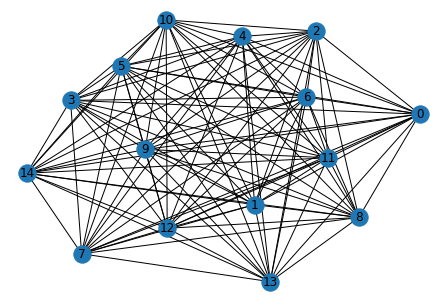

In [488]:
layout = nx.spring_layout(gDoc, k = 1/4, weight='weight', iterations= 50)
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}) #Getting labels is a bit annoying

In [144]:
for i, k in enumerate(grouped_tiny.index):
    print(i, k)

0 ENFJ
1 ENFP
2 ENTJ
3 ENTP
4 ESFJ
5 ESFP
6 ESTJ
7 ESTP
8 INFJ
9 INFP
10 INTJ
11 INTP
12 ISFP
13 ISTJ
14 ISTP


In [159]:
gWord = contractNetwork(g_2mode, 'word')
print(nx.info(gWord))

Name: 
Type: Graph
Number of nodes: 4634
Number of edges: 1802771
Average degree: 778.0626


In [160]:
wMean = np.mean([d['weight'] for n1, n2, d in gWord.edges(data = True)])
wMean

1.1207968177877279

In [167]:
all_tiny = all_tiny.iloc[:, :-1]

In [168]:
all_tiny

,creator_id,created_at,liked_by,text,hashtags,media,Type,Introvert,tokenized_sents,normalized_sents
2012-09-06 11:56:28.280229888,2724095695,2021-01-06 21:32:08,[3230341],I’m in a safe location we’re good \nY’all know...,[],[https://pbs.twimg.com/media/ErFECfoXUAExUbH.jpg],INTP,True,"[[I, ’m, in, a, safe, location], [we, ’re, goo...","[[be, safe, location], [good], [-PRON-, know, ..."
2012-04-10 18:27:21.280172032,843960734,2020-12-02 10:30:14,[844245066575241216],"I had 6 months to get in shape, work on my men...",[],[],ENTJ,False,"[[I, had, 6, months, to, get, in, shape, work,...","[[month, shape, work, mental, health, fix, lif..."
2009-08-01 18:04:23.322845184,174872416,2020-04-12 01:38:30,[22656297],"Whew, I’m having five children so hopefully at...",[],[],INFJ,True,"[[Whew, I, ’m, having, five, children, so, hop...","[[whew, be, have, child, hopefully, able, harm..."
2012-09-14 19:24:51.028934656,948280170665992198,2021-01-08 21:05:37,[2524031088],"Hey, ummm academic lawtwitter, this is gonna g...",[],[],ISFP,True,"[[Hey, ummm, academic, lawtwitter, this, is, g...","[[hey, ummm, academic, lawtwitter, gon, na, un..."
2012-05-21 19:01:24.344066051,49004456,2020-12-12 05:14:35,[38312614],I’m sorry this brick oven pizza got me crackin...,[],[],ENFJ,False,"[[I, ’m, sorry, this, brick, oven, pizza, got,...","[[be, sorry, brick, oven, pizza, get, crack]]"
...,...,...,...,...,...,...,...,...,...,...
2011-09-03 19:25:25.859995650,1917731,2020-10-10 23:53:05,[15595996],Debate commission cancels Oct. 15 Trump-Biden ...,[],[https://pbs.twimg.com/media/EkAYZ3zXsAAwQZm.png],ENTJ,False,"[[Debate, commission, cancels, Oct., 15], [Tru...","[[debate, commission, cancel, oct], [trump, bi..."
2011-01-01 06:42:05.269856259,61458407,2020-08-13 10:57:00,[2524529939],स्वतंत्रता के लिए अपना सबकुछ समर्पित कर देने व...,[],[https://pbs.twimg.com/media/EfS6j2ZU4AAdNbw.jpg],INFJ,True,"[[स्वतंत्रता, के, लिए, अपना, सबकुछ, समर्पित, क...","[[स्वतंत्रता, के, लिए, अपना, सबकुछ, समर्पित, क..."
2012-09-02 13:22:34.563588097,2281325286,2021-01-05 22:59:22,[258167579],Don Lemon assault lawsuit- \n\nLemon is accuse...,[],[https://pbs.twimg.com/media/ErAHarEXEAQP7ED.png],ENFP,False,"[[Don, Lemon, assault, lawsuit-], [Lemon, is, ...","[[don, lemon, assault, lawsuit-], [lemon, accu..."
2012-06-29 05:40:47.201882112,3042823136,2020-12-21 09:13:18,[500745512],,[],[https://pbs.twimg.com/media/EpwBgLtU8AEPY1Q.jpg],ESTJ,False,[[https://t.co/hUv7OD4sXC]],[[https://t.co/huv7od4sxc]]


In [192]:
g = wordCooccurrence(all_tiny['normalized_sents'].sum())

In [193]:
len(g)

5768

In [207]:
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 2])

In [211]:
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first

In [212]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [213]:
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 159
Number of edges: 219
Average degree:   2.7547


In [214]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 377
Number of edges: 439
Average degree:   2.3289


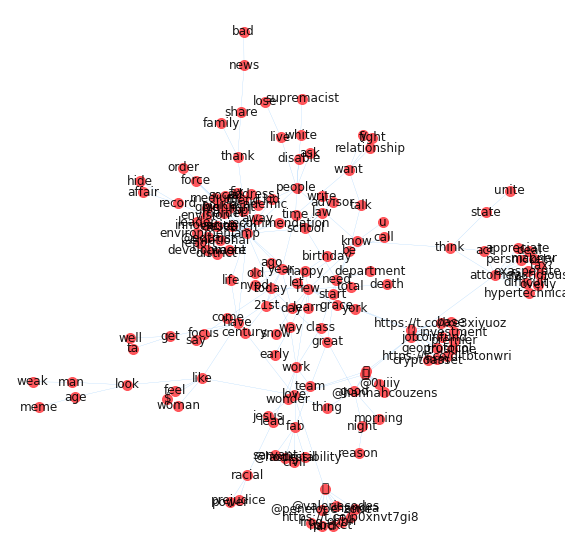

In [215]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [273]:
g_int = wordCooccurrence(int_small['normalized_sents'].sum())

In [268]:
g_ext = wordCooccurrence(ext_small['normalized_sents'].sum())

In [274]:
g_int.remove_edges_from([(n1, n2) for n1, n2, d in g_int.edges(data = True) if d['weight'] <= 3])

In [275]:
g_int.remove_nodes_from(list(nx.isolates(g_int))) #since we are changing the graph list() evaluates the isolates first

In [276]:
giant_int = max(connected_component_subgraphs(g_int), key=len) # keep just the giant connected component
print(nx.info(giant_int))

Name: 
Type: Graph
Number of nodes: 133
Number of edges: 228
Average degree:   3.4286


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127881 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127881 missing from current font.
  font.set_text(s, 0, flags=flags)


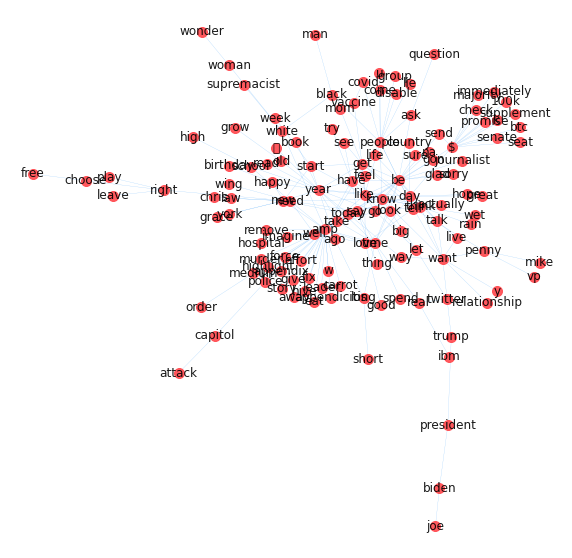

In [277]:
#introvert network
layout = nx.spring_layout(giant_int, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant_int, ax = ax, pos = layout, labels = {n:n for n in giant_int.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [269]:
g_ext.remove_edges_from([(n1, n2) for n1, n2, d in g_ext.edges(data = True) if d['weight'] <= 3])

In [270]:
g_ext.remove_nodes_from(list(nx.isolates(g_ext))) #since we are changing the graph list() evaluates the isolates first

In [271]:
giant_ext = max(connected_component_subgraphs(g_ext), key=len) # keep just the giant connected component
print(nx.info(giant_ext))

Name: 
Type: Graph
Number of nodes: 134
Number of edges: 241
Average degree:   3.5970


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127926 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127926 missing from current font.
  font.set_text(s, 0, flags=flags)


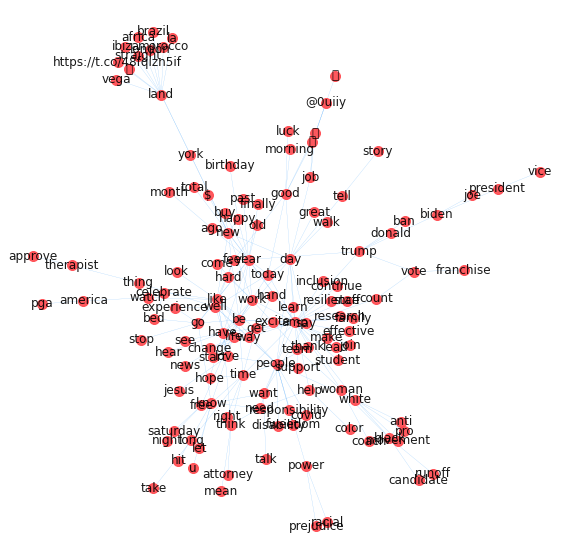

In [272]:
layout = nx.spring_layout(giant_ext, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant_ext, ax = ax, pos = layout, labels = {n:n for n in giant_ext.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [278]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(giant))

In [279]:
c

[frozenset({'21st',
            '@edtrust',
            '@hodigital',
            'academic',
            'accessibility',
            'address',
            'advisor',
            'affair',
            'ago',
            'amp',
            'ask',
            'away',
            'base',
            'be',
            'birthday',
            'call',
            'century',
            'civil',
            'class',
            'coinfund',
            'come',
            'cryptoasset',
            'day',
            'death',
            'department',
            'development',
            'disable',
            'district',
            'early',
            'emotional',
            'environment',
            'envision',
            'excite',
            'fab',
            'fight',
            'firm',
            'fix',
            'focus',
            'force',
            'friend',
            'geoprotocol',
            'get',
            'give',
            'grace',
            'great',
    

In [280]:
giant = nx.Graph(giant)

In [281]:
giant.remove_nodes_from([n for n in giant.nodes if len(set(giant.neighbors(n))) >= 2000]) 
giant.remove_nodes_from(list(nx.isolates(giant)))
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 159
Number of edges: 219
Average degree:   2.7547


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129395 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0, flags=flags)


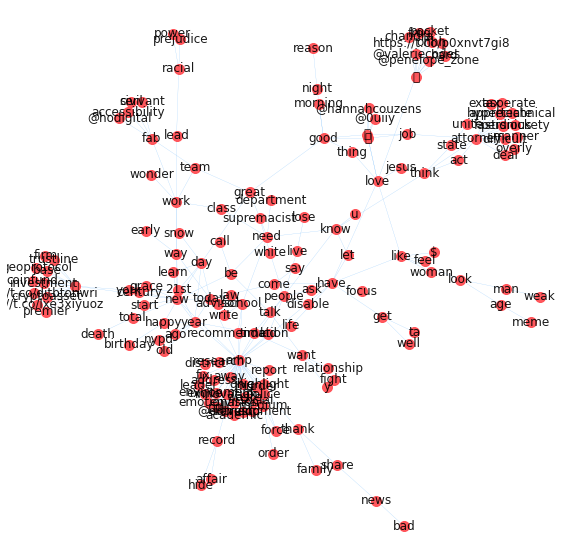

In [282]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [283]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

amp, medium, police, murder, highlight


In [284]:
#extrovert cliques
print(', '.join(max(nx.clique.find_cliques(giant_ext), key = lambda x: len(x))))

amp, be, year, work, new


In [285]:
#extrovert cliques
print(', '.join(max(nx.clique.find_cliques(giant_int), key = lambda x: len(x))))

amp, murder, medium, police, highlight


In [299]:
giant_int.neighbors('be')

<generator object FilterAtlas.__iter__.<locals>.<genexpr> at 0x7f8f22cd1510>

In [325]:
beNeighbors = giant_int.neighbors('police')
g_be = giant_int.subgraph(beNeighbors)
print(nx.info(g_be))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 8
Average degree:   2.6667


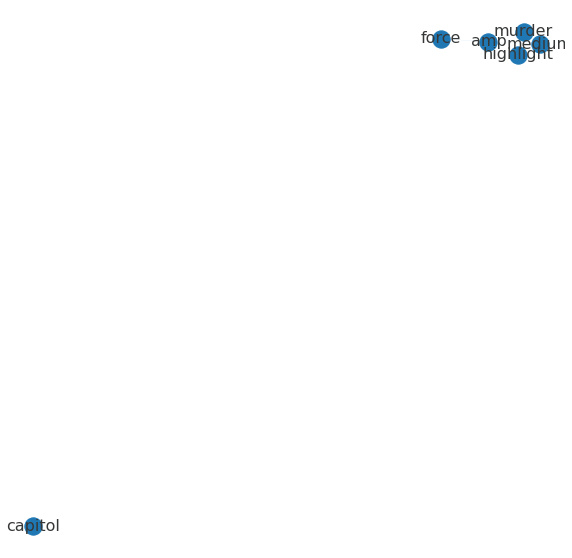

In [326]:
layout_be = nx.spring_layout(g_be, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
maxWeight = max((d['weight'] for n1, n2, d in g_be.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_be.edges(data = True)))
nx.draw(g_be, ax = ax, pos = layout_be, labels = {n:n for n in g_be.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_be.edges(data = True)], 
        alpha = 1, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma')) 

In [327]:
beNeighbors = giant_ext.neighbors('work')
g_be = giant_ext.subgraph(beNeighbors)
print(nx.info(g_be))

Name: 
Type: Graph
Number of nodes: 9
Number of edges: 21
Average degree:   4.6667


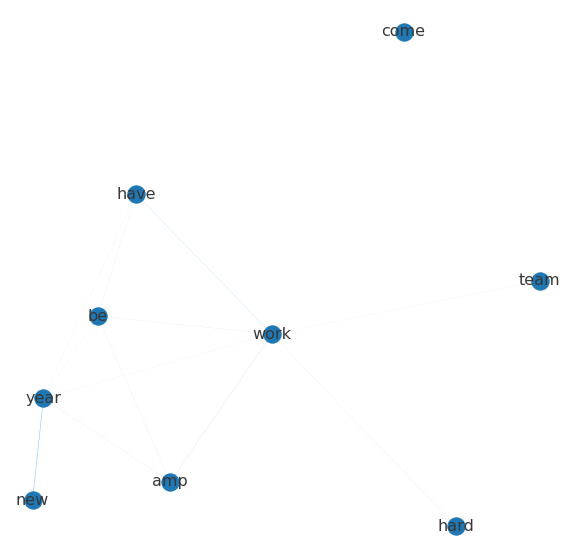

In [328]:
layout_be = nx.spring_layout(g_be, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
maxWeight = max((d['weight'] for n1, n2, d in g_be.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_be.edges(data = True)))
nx.draw(g_be, ax = ax, pos = layout_be, labels = {n:n for n in g_be.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_be.edges(data = True)], 
        alpha = 1, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma')) 

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that calculate different kinds of centrality for distinct words or documents in a network composed from your corpus of interest. Which type of words tend to be most and least central? Can you identify how different centrality measures distinguish different kind of words in your corpus? What do these patterns suggest about the semantic content and structure of your documents? Finally, calculate global measure for your network(s) and discuss what they reveal.

In [332]:
dcentralities_int = nx.degree_centrality(giant_int)

In [361]:
#introvets
sorted(dcentralities_int.items(), reverse = True, key = lambda x:x[1])[:10]

[('amp', 0.2727272727272727),
 ('be', 0.18181818181818182),
 ('year', 0.14393939393939395),
 ('people', 0.12121212121212122),
 ('$', 0.11363636363636365),
 ('like', 0.10606060606060606),
 ('want', 0.09090909090909091),
 ('day', 0.08333333333333334),
 ('need', 0.07575757575757576),
 ('time', 0.07575757575757576)]

In [362]:
dcentralities_ext = nx.degree_centrality(giant_ext)

In [363]:
#extroverts
sorted(dcentralities_ext.items(), reverse = True, key = lambda x:x[1])[:10]

[('amp', 0.24060150375939848),
 ('people', 0.15037593984962405),
 ('year', 0.12781954887218044),
 ('be', 0.12030075187969924),
 ('like', 0.12030075187969924),
 ('day', 0.10526315789473684),
 ('land', 0.10526315789473684),
 ('new', 0.10526315789473684),
 ('have', 0.09022556390977443),
 ('time', 0.08270676691729323)]

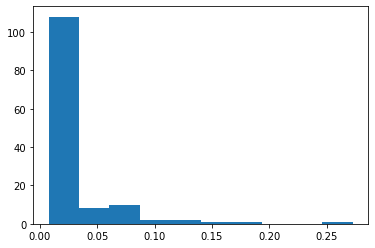

In [339]:
plt.hist(list(dcentralities_int.values()))
plt.show()

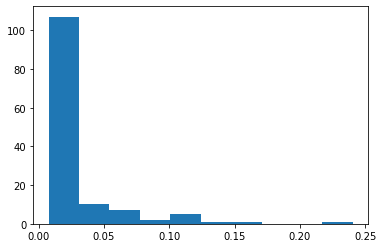

In [340]:
plt.hist(list(dcentralities_ext.values()))
plt.show()

In [341]:
centralities_int = nx.betweenness.betweenness_centrality(giant_int)
centralities_ext = nx.betweenness.betweenness_centrality(giant_ext)

In [346]:
sorted(centralities_int.items(), key = lambda x : x[1], reverse=True)[:10]

[('amp', 0.5007754630672742),
 ('be', 0.19676849450444175),
 ('$', 0.15283808642587268),
 ('year', 0.14418529012560935),
 ('people', 0.14077036259548398),
 ('need', 0.1216046310078232),
 ('want', 0.10780808815159956),
 ('time', 0.10056641382109809),
 ('like', 0.08658884744936096),
 ('know', 0.08221309173772734)]

In [347]:
sorted(centralities_ext.items(), key = lambda x : x[1], reverse=True)[:10]

[('amp', 0.39186037352375663),
 ('new', 0.21517632578808243),
 ('people', 0.19403677132809447),
 ('day', 0.14951129401694327),
 ('year', 0.14823330917225405),
 ('land', 0.14524948735475052),
 ('like', 0.1394689446918951),
 ('be', 0.13060887354090275),
 ('trump', 0.1158352681848922),
 ('time', 0.08209470971221602)]

In [348]:
c_centralities_int = nx.closeness_centrality(giant_int)
c_centralities_ext = nx.closeness_centrality(giant_ext)

In [349]:
sorted(c_centralities_int.items(), key = lambda x : x[1], reverse=True)[:10]

[('amp', 0.4647887323943662),
 ('be', 0.4230769230769231),
 ('like', 0.41509433962264153),
 ('people', 0.3987915407854985),
 ('have', 0.39285714285714285),
 ('time', 0.3916913946587537),
 ('go', 0.3870967741935484),
 ('say', 0.3848396501457726),
 ('need', 0.3697478991596639),
 ('year', 0.3697478991596639)]

In [350]:
sorted(c_centralities_ext.items(), key = lambda x : x[1], reverse=True)[:10]

[('amp', 0.4478114478114478),
 ('be', 0.4117647058823529),
 ('year', 0.40425531914893614),
 ('people', 0.3993993993993994),
 ('new', 0.39820359281437123),
 ('like', 0.39465875370919884),
 ('day', 0.3911764705882353),
 ('work', 0.3674033149171271),
 ('today', 0.3643835616438356),
 ('time', 0.36239782016348776)]

In [352]:
e_centralities_int = nx.eigenvector_centrality(giant_int)
e_centralities_ext = nx.eigenvector_centrality(giant_ext)

In [353]:
sorted(e_centralities_int.items(), key = lambda x : x[1], reverse=True)[:10]

[('amp', 0.4454909394242707),
 ('be', 0.3789364272637633),
 ('like', 0.2893844119153484),
 ('people', 0.21977351533948183),
 ('year', 0.21705608683631508),
 ('have', 0.21460241564307456),
 ('say', 0.1893124853069914),
 ('time', 0.17765797802336147),
 ('go', 0.17505144742841494),
 ('know', 0.1744701458383935)]

In [354]:
sorted(e_centralities_ext.items(), key = lambda x : x[1], reverse=True)[:10]

[('amp', 0.4382418980369727),
 ('be', 0.3294542398481516),
 ('year', 0.2934617365498879),
 ('like', 0.2609154511671416),
 ('people', 0.2546806532505272),
 ('new', 0.2546663704722362),
 ('day', 0.22327292061827095),
 ('work', 0.20103760628296558),
 ('have', 0.1888688050410828),
 ('time', 0.17595033029801727)]

In [355]:
def filterWords(G, minWeight = 3, filter_ = "betweenness", rule = "number", value_of_rule = 200):
    """Function to filter network by degree centrality measures"""
    G = G.copy()
    try:
        G.remove_edges_from([(n1,n2) for n1, n2, d in G.edges(data = True) if d['weight'] < minWeight])
    except:
        print("weight might be missing from one or more edges")
        raise
    if filter_ =="betweenness":
        index = nx.betweenness_centrality(G) #betweeness centrality score
    elif filter_ == "closeness":
        index = nx.closeness_centrality(G) #closeness centrality score
    elif filter_ == "eigenvector":
        index = nx.eigenvector_centrality(G) #eigenvector centrality score
    elif filter_ == "degree":
        index = nx.degree_centrality(G) #degree centrality score
    else:
        raise ValueError("wrong filter paremeter, should be: betweenness/closeness/eigenvector")    
        
    if rule=='number':# if filter by limiting the total number of nodes 
        
        sorted_index = sorted(index.items(), key=lambda x:x[1], reverse=True)
        value_of_rule = np.min([value_of_rule, len(G.nodes)])
        
        nodes_remain = {}
        for word, centr in sorted_index[:value_of_rule]:
            nodes_remain[word] = centr
        G.remove_nodes_from([n for n in index if n not in nodes_remain])
        print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G
    
    if rule=='above':# if filter by limiting the min value of centrality
        value_of_rule = np.max([float(value_of_rule),0])
        G.remove_nodes_from([n for n in index if index[n] >=value_of_rule])
        print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G
    
    if rule=='below':# if filter by limiting the max value of centrality
        value_of_rule = np.max([float(value_of_rule),0])
        G.remove_nodes_from([n for n in index if index[n] <=value_of_rule])
        print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G

In [356]:
giant_filtered30_int = filterWords(giant_int, minWeight=3, filter_='betweenness', rule='number', value_of_rule=25)
print(nx.info(giant_filtered30_int))

Total number of nodes(after filtering) in the graph is 25
Name: 
Type: Graph
Number of nodes: 25
Number of edges: 74
Average degree:   5.9200


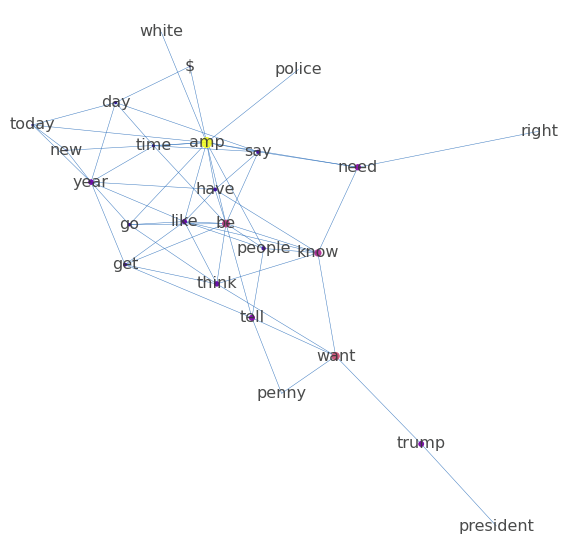

In [357]:
layout_giant_filtered30_int = nx.spring_layout(giant_filtered30_int, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_giant30_int = nx.betweenness_centrality(giant_filtered30_int)
maxC = max(centralities_giant30_int.items(), key = lambda x : x[1])[1]
nx.draw(giant_filtered30_int, ax = ax, pos = layout_giant_filtered30_int, labels = {n: n for n in giant_filtered30_int.nodes()},
        alpha = .9, 
        width = .5,
        node_color = [centralities_giant30_int[n] / maxC for n in giant_filtered30_int.nodes],
        node_size = [centralities_giant30_int[n] / maxC * 100 for n in giant_filtered30_int.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

In [359]:
giant_filtered30_ext = filterWords(giant_ext, minWeight=3, filter_='betweenness', rule='number', value_of_rule=25)
print(nx.info(giant_filtered30_ext))

Total number of nodes(after filtering) in the graph is 25
Name: 
Type: Graph
Number of nodes: 25
Number of edges: 71
Average degree:   5.6800


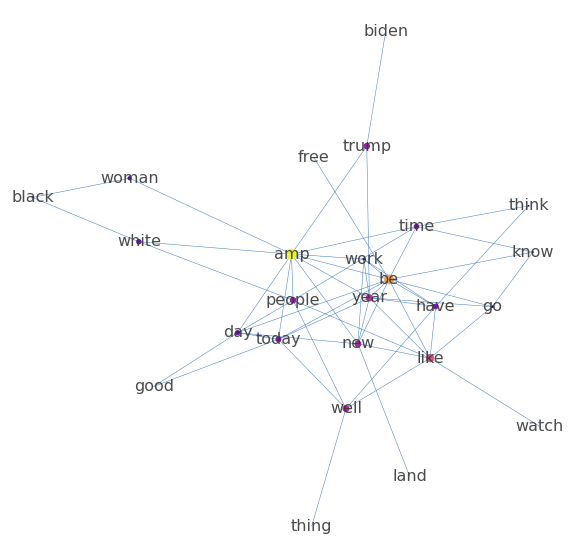

In [360]:
layout_giant_filtered30_ext = nx.spring_layout(giant_filtered30_ext, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_giant30_ext = nx.betweenness_centrality(giant_filtered30_ext)
maxC = max(centralities_giant30_ext.items(), key = lambda x : x[1])[1]
nx.draw(giant_filtered30_ext, ax = ax, pos = layout_giant_filtered30_ext, labels = {n: n for n in giant_filtered30_ext.nodes()},
        alpha = .9, 
        width = .5,
        node_color = [centralities_giant30_ext[n] / maxC for n in giant_filtered30_ext.nodes],
        node_size = [centralities_giant30_ext[n] / maxC * 100 for n in giant_filtered30_ext.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

In [364]:
nx.density(giant_int)

0.025974025974025976

In [365]:
nx.density(giant_ext)

0.027045225002805522

In [366]:
np.mean([v for w, v in nx.degree(giant_int)])

3.4285714285714284

In [367]:
np.mean([v for w, v in nx.degree(giant_ext)])

3.5970149253731343

In [368]:
nx.diameter(giant_int)

10

In [369]:
nx.diameter(giant_ext)

9

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that construct at least two different networks comprising different combinations of word types, linked by different syntactic structures, which illuminate your corpus and the dynamics you are interested to explore. Graph these networks or subnetworks within them. What are relationships that are meaningful? 

<span style="color:red">***Stretch***: Graph some word-centered "ego-networks" with words one link away, two links away, and three links away (we only did up to two links away above).

In [373]:
import spacy

In [374]:
nlp = spacy.load('en')

In [375]:
def posCooccurrence(sentences, *posType, makeMatrix = False):
    words = set()
    reducedSents = []
    #Only using the first kind of POS for each word
    wordsMap = {}
    for sent in sentences:
        s = [(w, t) for w, t in lucem_illud.spacy_pos(sent) if t in posType]
        for w, t in s:
            if w not in wordsMap:
                wordsMap[w] = t
        reducedSent = [w for w, t in s]
        words |= set(reducedSent)
        reducedSents.append(reducedSent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in reducedSents:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        for w in g.nodes:
            g.nodes[w]['bipartite'] = wordsMap[w]
        return g

In [376]:
gNN_int = posCooccurrence(int_small['normalized_sents'].sum(), 'NN')

In [377]:
print(nx.info(gNN_int))

Name: 
Type: Graph
Number of nodes: 2049
Number of edges: 5449
Average degree:   5.3187


In [385]:
gNN_ext = posCooccurrence(ext_small['normalized_sents'].sum(), 'NN')

In [379]:
print(nx.info(gNN_ext))

Name: 
Type: Graph
Number of nodes: 2189
Number of edges: 6129
Average degree:   5.5998


In [381]:
gNN_int.remove_nodes_from([n for n in gNN_int.nodes if len(set(gNN_int.neighbors(n))) <= 20]) 
print(nx.info(gNN_int))

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 72
Average degree:   8.0000


In [382]:
gNN_int.remove_edges_from([(n1, n2) for n1, n2, d in gNN_int.edges(data = True) if d['weight'] <= 1])
print(nx.info(gNN_int))

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 36
Average degree:   4.0000


In [387]:
gNN_ext.remove_nodes_from([n for n in gNN_ext.nodes if len(set(gNN_ext.neighbors(n))) <= 21]) 
print(nx.info(gNN_ext))

Name: 
Type: Graph
Number of nodes: 9
Number of edges: 33
Average degree:   7.3333


In [388]:
gNN_ext.remove_edges_from([(n1, n2) for n1, n2, d in gNN_ext.edges(data = True) if d['weight'] <= 1])
print(nx.info(gNN_ext))

Name: 
Type: Graph
Number of nodes: 9
Number of edges: 24
Average degree:   5.3333


In [391]:
gNN_int.remove_nodes_from(list(nx.isolates(gNN_int)))
print(nx.info(gNN_int))

Name: 
Type: Graph
Number of nodes: 16
Number of edges: 36
Average degree:   4.5000


In [392]:
gNN_ext.remove_nodes_from(list(nx.isolates(gNN_ext)))
print(nx.info(gNN_ext))

Name: 
Type: Graph
Number of nodes: 9
Number of edges: 24
Average degree:   5.3333


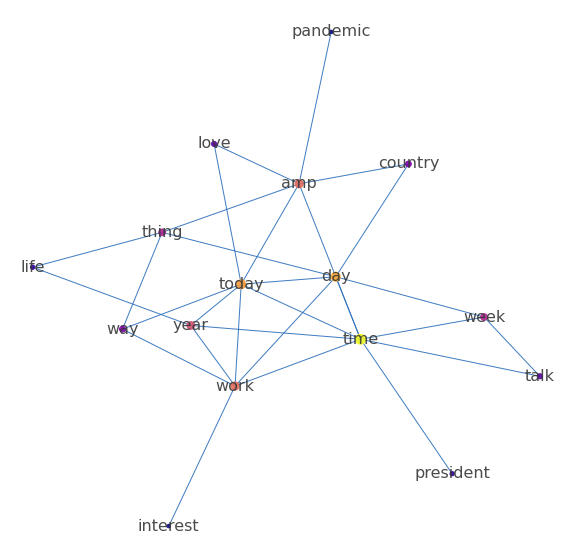

In [393]:
layout_nn_int = nx.spring_layout(gNN_int, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nn_int = nx.eigenvector_centrality(gNN_int)
maxC = max(centralities_nn_int.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in gNN_int.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in gNN_int.edges(data = True)))
nx.draw(gNN_int, ax = ax, pos = layout_nn_int, labels = {n: n for n in gNN_int.nodes()},
        #width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in gNN.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities_nn_int[n] / maxC for n in gNN_int.nodes],
        node_size = [centralities_nn_int[n] / maxC * 100 for n in gNN_int.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

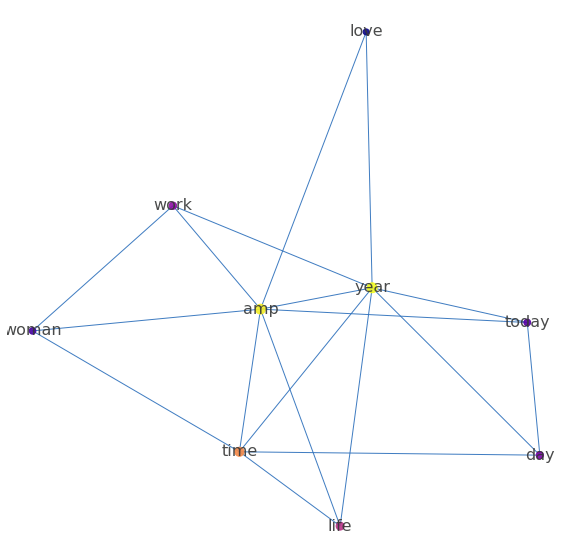

In [394]:
layout_nn_ext = nx.spring_layout(gNN_ext, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nn_ext = nx.eigenvector_centrality(gNN_ext)
maxC = max(centralities_nn_ext.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in gNN_ext.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in gNN_ext.edges(data = True)))
nx.draw(gNN_ext, ax = ax, pos = layout_nn_ext, labels = {n: n for n in gNN_ext.nodes()},
        #width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in gNN.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities_nn_ext[n] / maxC for n in gNN_ext.nodes],
        node_size = [centralities_nn_ext[n] / maxC * 100 for n in gNN_ext.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

In [406]:
gNV_int = posCooccurrence(int_small['normalized_sents'].sum(), 'NN', 'VB')

In [396]:
gNV_ext = posCooccurrence(ext_small['normalized_sents'].sum(), 'NN', 'VB')

In [397]:
print(nx.info(gNV_int))

Name: 
Type: Graph
Number of nodes: 2265
Number of edges: 8341
Average degree:   7.3651


In [398]:
print(nx.info(gNV_ext))

Name: 
Type: Graph
Number of nodes: 2410
Number of edges: 9034
Average degree:   7.4971


In [407]:
gNV_int.remove_edges_from([(n1,n2) for n1,n2,d in gNV_int.edges(data = True) if gNV_int.nodes[n1]['bipartite'] == gNV_int.nodes[n2]['bipartite']])
gNV_ext.remove_edges_from([(n1,n2) for n1,n2,d in gNV_ext.edges(data = True) if gNV_ext.nodes[n1]['bipartite'] == gNV_ext.nodes[n2]['bipartite']])

In [411]:
print(nx.info(gNV_int))

Name: 
Type: Graph
Number of nodes: 28
Number of edges: 44
Average degree:   3.1429


In [413]:
print(nx.info(gNV_ext))

Name: 
Type: Graph
Number of nodes: 30
Number of edges: 40
Average degree:   2.6667


In [410]:
gNV_int.remove_edges_from([(n1, n2) for n1, n2, d in gNV_int.edges(data = True) if d['weight'] <= 1])
gNV_int.remove_nodes_from([n for n in gNV_int.nodes if len(set(gNV_int.neighbors(n))) <= 2])

In [412]:
gNV_ext.remove_edges_from([(n1, n2) for n1, n2, d in gNV_ext.edges(data = True) if d['weight'] <= 1])
gNV_ext.remove_nodes_from([n for n in gNV_ext.nodes if len(set(gNV_ext.neighbors(n))) <= 2])

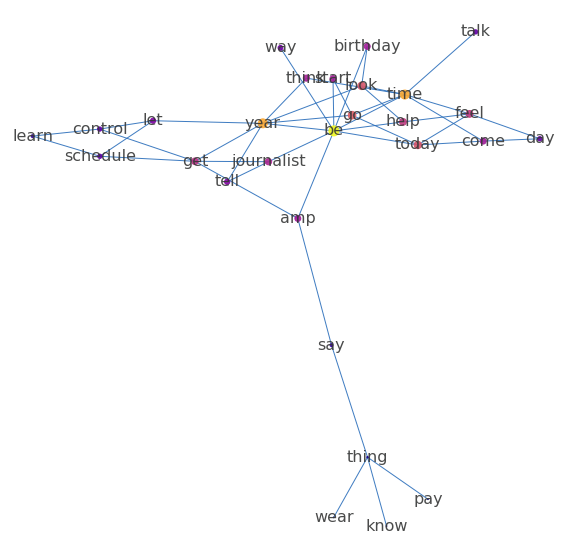

In [414]:
layout_nv_int = nx.spring_layout(gNV_int, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nv_int = nx.eigenvector_centrality(gNV_int)
maxC = max(centralities_nv_int.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in gNV_int.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in gNV_int.edges(data = True)))
nx.draw(gNV_int, ax = ax, pos = layout_nv_int, labels = {n: n for n in gNV_int.nodes()},
        alpha = .9, 
        node_color = [centralities_nv_int[n] / maxC for n in gNV_int.nodes],
        node_size = [centralities_nv_int[n] / maxC * 100 for n in gNV_int.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       ) 

In [417]:
gNV_ext.remove_nodes_from(list(nx.isolates(gNV_ext)))

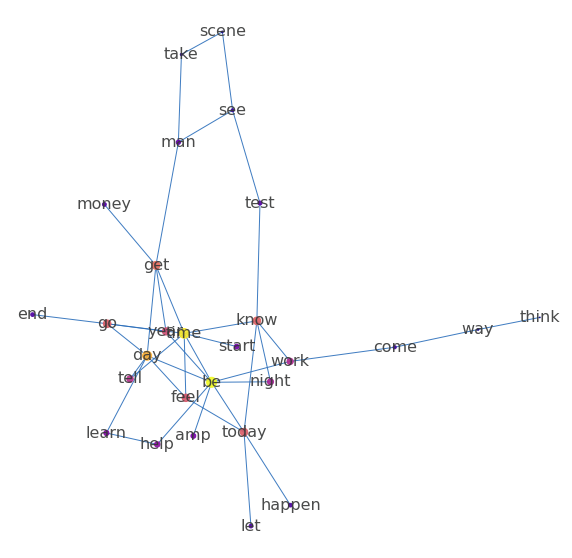

In [418]:
layout_nv_ext = nx.spring_layout(gNV_ext, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nv_ext = nx.eigenvector_centrality(gNV_ext)
maxC = max(centralities_nv_ext.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in gNV_ext.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in gNV_ext.edges(data = True)))
nx.draw(gNV_ext, ax = ax, pos = layout_nv_ext, labels = {n: n for n in gNV_ext.nodes()},
        alpha = .9, 
        node_color = [centralities_nv_ext[n] / maxC for n in gNV_ext.nodes],
        node_size = [centralities_nv_ext[n] / maxC * 100 for n in gNV_ext.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       ) 

In [495]:
g_i_int = gNV_int.subgraph(['go'] + list(gNV_int.neighbors('go')))

In [496]:
print(nx.info(g_i_int))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 4
Average degree:   1.6000


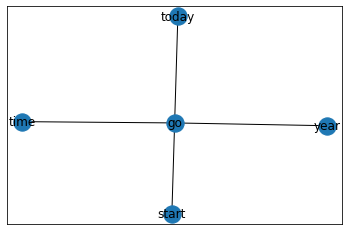

In [497]:
nx.draw_networkx(g_i_int)

In [498]:
g_i_ext = gNV_ext.subgraph(['go'] + list(gNV_ext.neighbors('go')))

In [499]:
print(nx.info(g_i_ext))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 4
Average degree:   1.6000


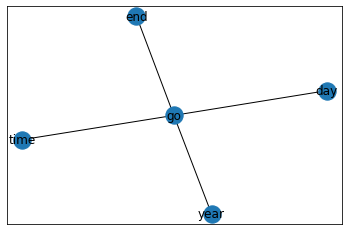

In [500]:
nx.draw_networkx(g_i_ext)

In [442]:
gNJ_int = posCooccurrence(int_small['normalized_sents'].sum(), 'NN', 'JJ')
print(nx.info(gNJ_int))

Name: 
Type: Graph
Number of nodes: 2751
Number of edges: 10331
Average degree:   7.5107


In [443]:
gNJ_ext = posCooccurrence(ext_small['normalized_sents'].sum(), 'NN', 'JJ')
print(nx.info(gNJ_ext))

Name: 
Type: Graph
Number of nodes: 2952
Number of edges: 10971
Average degree:   7.4329


In [445]:
gNJ_filtered200_int = filterWords(gNJ_int, minWeight=3, filter_='betweenness', rule='number', value_of_rule=25)
print(nx.info(gNJ_filtered200_int))

Total number of nodes(after filtering) in the graph is 25
Name: 
Type: Graph
Number of nodes: 25
Number of edges: 25
Average degree:   2.0000


In [446]:
gNJ_filtered200_ext = filterWords(gNJ_ext, minWeight=3, filter_='betweenness', rule='number', value_of_rule=25)
print(nx.info(gNJ_filtered200_ext))

Total number of nodes(after filtering) in the graph is 25
Name: 
Type: Graph
Number of nodes: 25
Number of edges: 44
Average degree:   3.5200


In [448]:
gNJ_filtered200_int.remove_nodes_from(list(nx.isolates(gNJ_filtered200_int)))

In [449]:
gNJ_filtered200_ext.remove_nodes_from(list(nx.isolates(gNJ_filtered200_ext)))

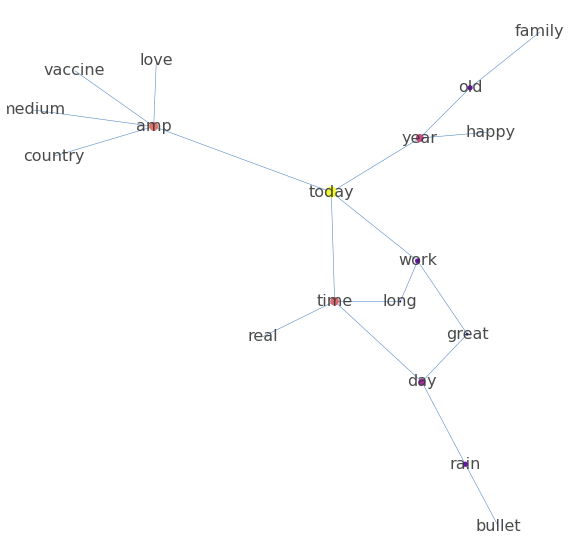

In [450]:
layout_NJ_filtered200_int = nx.spring_layout(gNJ_filtered200_int, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nj200_int = nx.betweenness_centrality(gNJ_filtered200_int)
maxC = max(centralities_nj200_int.items(), key = lambda x : x[1])[1]
nx.draw(gNJ_filtered200_int, ax = ax, pos = layout_NJ_filtered200_int, labels = {n: n for n in gNJ_filtered200_int.nodes()},
        alpha = .9, 
        width = .5,
        node_color = [centralities_nj200_int[n] / maxC for n in gNJ_filtered200_int.nodes],
        node_size = [centralities_nj200_int[n] / maxC * 100 for n in gNJ_filtered200_int.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0, flags=flags)


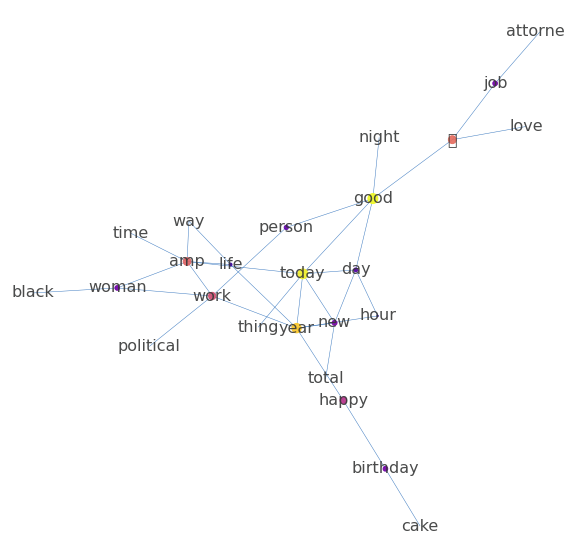

In [451]:
layout_NJ_filtered200_ext = nx.spring_layout(gNJ_filtered200_ext, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nj200_ext = nx.betweenness_centrality(gNJ_filtered200_ext)
maxC = max(centralities_nj200_ext.items(), key = lambda x : x[1])[1]
nx.draw(gNJ_filtered200_ext, ax = ax, pos = layout_NJ_filtered200_ext, labels = {n: n for n in gNJ_filtered200_ext.nodes()},
        alpha = .9, 
        width = .5,
        node_color = [centralities_nj200_ext[n] / maxC for n in gNJ_filtered200_ext.nodes],
        node_size = [centralities_nj200_ext[n] / maxC * 100 for n in gNJ_filtered200_ext.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">Construct cells immediately below this that perform a similar social similarity or influence analysis on a dataset relevant to your final project. Create relationships between actors in a network based on your dataset (e.g., person to person or document to document), and perform analyses that interrogate the structure of their interactions, similarity, and/or influence on one another. (For example, if relevant to your final project, you could explore different soap operas, counting how many times a character may have used the word love in conversation with another character, and identify if characters in love speak like each other. Or do opposites attract?) What does that analysis and its output reveal about the relative influence of each actor on others? What does it reveal about the social game being played?

<span style="color:red">Stretch 1:
Render the social network with weights (e.g., based on the number of scenes in which actors appear together), then calculate the most central actors in the show.Realtime output can be viewed in shell.

<span style="color:red">Stretch 2:
Implement more complex measures of similarity based on the papers you have read.# Exercise 4 

In [455]:
grouped_small = all_small.loc[:, ['Type', 'text']].groupby('Type').sum()

In [458]:
grouped_small['Tokenized Texts'] = grouped_small['text'].apply(lambda x: lucem_illud.word_tokenize(x))

In [461]:
grouped_small['Normalized Tokens'] = grouped_small['text'].apply(lambda x: lucem_illud.normalizeTokens(x))

In [462]:
grouped_small

,text,Tokenized Texts,Normalized Tokens
Type,,,
ENFJ,We are all learning a new vocabulary.\n\nHere'...,"[We, are, all, learning, a, new, vocabulary, H...","[learn, new, vocabulary, clarification, public..."
ENFP,"Today I’m 9 months clean from Heroin/Fetty, me...","[Today, I, ’m, 9, months, clean, from, Heroin,...","[today, month, clean, heroin, fetty, meth, xan..."
ENTJ,@evermorered1989 @AlexChenault @raplinebabie @...,"[@evermorered1989, @AlexChenault, @raplinebabi...","[@evermorered1989, @alexchenault, @raplinebabi..."
ENTP,by cosmo.guy https://t.co/bS73plMCmuThis has a...,"[by, cosmo.guy, https://t.co/bS73plMCmuThis, h...","[cosmo.guy, https://t.co/bs73plmcmuthis, point..."
ESFJ,18 months.\n\nIt’s been 18 months.\n\n222 mont...,"[18, months, It, ’s, been, 18, months, 222, mo...","[month, month, month, god, miss, https://t.co/..."
ESFP,Ready to Rise Up and Lead in my official Natio...,"[Ready, to, Rise, Up, and, Lead, in, my, offic...","[ready, rise, lead, official, national, studen..."
ESTJ,Joe’s ready 💕boy gee so happy our tax dollars ...,"[Joe, ’s, ready, 💕, boy, gee, so, happy, our, ...","[joe, ready, 💕, boy, gee, happy, tax, dollar, ..."
ESTP,I'm no longer at war with myself and that's a ...,"[I, 'm, no, longer, at, war, with, myself, and...","[long, war, major, fvckn, achievement, 現在已經過四十..."
INFJ,@MalakaGharib @DianaElbasha Came through with ...,"[@MalakaGharib, @DianaElbasha, Came, through, ...","[@malakagharib, @dianaelbasha, come, 🔥, 🔥, 🔥, ..."


In [463]:
import nltk

In [468]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pd.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pd.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

In [465]:
grouped_small

,text,Tokenized Texts,Normalized Tokens
Type,,,
ENFJ,We are all learning a new vocabulary.\n\nHere'...,"[We, are, all, learning, a, new, vocabulary, H...","[learn, new, vocabulary, clarification, public..."
ENFP,"Today I’m 9 months clean from Heroin/Fetty, me...","[Today, I, ’m, 9, months, clean, from, Heroin,...","[today, month, clean, heroin, fetty, meth, xan..."
ENTJ,@evermorered1989 @AlexChenault @raplinebabie @...,"[@evermorered1989, @AlexChenault, @raplinebabi...","[@evermorered1989, @alexchenault, @raplinebabi..."
ENTP,by cosmo.guy https://t.co/bS73plMCmuThis has a...,"[by, cosmo.guy, https://t.co/bS73plMCmuThis, h...","[cosmo.guy, https://t.co/bs73plmcmuthis, point..."
ESFJ,18 months.\n\nIt’s been 18 months.\n\n222 mont...,"[18, months, It, ’s, been, 18, months, 222, mo...","[month, month, month, god, miss, https://t.co/..."
ESFP,Ready to Rise Up and Lead in my official Natio...,"[Ready, to, Rise, Up, and, Lead, in, my, offic...","[ready, rise, lead, official, national, studen..."
ESTJ,Joe’s ready 💕boy gee so happy our tax dollars ...,"[Joe, ’s, ready, 💕, boy, gee, so, happy, our, ...","[joe, ready, 💕, boy, gee, happy, tax, dollar, ..."
ESTP,I'm no longer at war with myself and that's a ...,"[I, 'm, no, longer, at, war, with, myself, and...","[long, war, major, fvckn, achievement, 現在已經過四十..."
INFJ,@MalakaGharib @DianaElbasha Came through with ...,"[@MalakaGharib, @DianaElbasha, Came, through, ...","[@malakagharib, @dianaelbasha, come, 🔥, 🔥, 🔥, ..."


In [472]:
import seaborn as sns

In [479]:
L = []
for p in grouped_small['Normalized Tokens']:
    l = []
    for q in grouped_small['Normalized Tokens']:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)

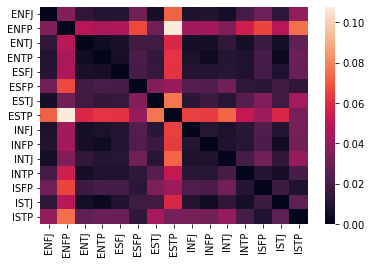

In [480]:
fig = plt.figure()
div = pd.DataFrame(M, columns = list(grouped_small.index), index = list(grouped_small.index))
ax = sns.heatmap(div)
plt.show()

In [481]:
L = []
for p in grouped_small['Normalized Tokens']:
    l = []
    for q in grouped_small['Normalized Tokens']:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)



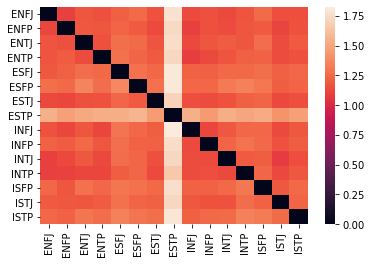

In [482]:
fig = plt.figure()
div = pd.DataFrame(M, columns = list(grouped_small.index), index = list(grouped_small.index))
ax = sns.heatmap(div)
plt.show()